# <html>

    
<div  style="background-color:w; color:#636363;border:#63b365; border-width:5px; border-style:solid;">

    
<p><center><img src="https://drive.google.com/thumbnail?id=1yPGYO8HkTanlqsIXozDIUvUVuvawAdG_" width ="6%"  /><font size=8> <b>Modelo Preditivo Doenças Hepáticas</b></font> </p>
<p ><font size=6><center>Ives Tulio</font> </p>
<p ><font size=4><center><b>email:</b> ivestulio@gmail.com <br> 
<b>Linkedin:</b> in/ives-tulio/<br>
<b>GitHub:</b> ivestulio</p>

</div>



**Descrição Dados:**
* Resultados de Sangue de 615 pacientes,
* De ambos os sexos 
* com idade entre 19 e 77 anos 
* divididos em:
> * Doadores de sangue 
> * Cirrose 
> * Hepatite 
> * Fibroses 
> * doadores de sangue suspeitos

**Avaliações:**

> 1. Há relação entre o sexo e doenças hepáticas ?
> 2. Qual faixa etária é mais acometida por doenças hepáticas ?
> 3. Qual a relação entre as doenças hepáticas e os resultados do exame de sangue ?

<div style="background-color:#99EEAA; color:#000066;">
    <h2><center>Bibliotecas:</center></h2>
</div>

In [183]:
# Manipulação de Dados:

import pandas as pd 
import numpy as np

# Visualização Gráfica:

import matplotlib.pyplot as plt
import seaborn as sns 

#Pré-processamento de dados:
from sklearn.model_selection import train_test_split
from  sklearn.preprocessing import StandardScaler
from sklearn import metrics

# Modelos 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier 
from sklearn.ensemble import GradientBoostingClassifier


<div style="background-color:#99EEAA; color:#000066;">
    <h2><center>Importando os Dados:</center></h2>
</div>


In [377]:
ds = pd.read_csv("/home/ives/Desktop/PROGRAMAÇAO/DataAnalisys/Doencas_hepaticas/data/HepatitisCdata.csv")
ds.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [378]:
print(ds.describe())

       Unnamed: 0         Age         ALB         ALP         ALT         AST  \
count  615.000000  615.000000  614.000000  597.000000  614.000000  615.000000   
mean   308.000000   47.408130   41.620195   68.283920   28.450814   34.786341   
std    177.679487   10.055105    5.780629   26.028315   25.469689   33.090690   
min      1.000000   19.000000   14.900000   11.300000    0.900000   10.600000   
25%    154.500000   39.000000   38.800000   52.500000   16.400000   21.600000   
50%    308.000000   47.000000   41.950000   66.200000   23.000000   25.900000   
75%    461.500000   54.000000   45.200000   80.100000   33.075000   32.900000   
max    615.000000   77.000000   82.200000  416.600000  325.300000  324.000000   

              BIL         CHE        CHOL         CREA         GGT        PROT  
count  615.000000  615.000000  605.000000   615.000000  615.000000  614.000000  
mean    11.396748    8.196634    5.368099    81.287805   39.533171   72.044137  
std     19.673150    2.2056

In [379]:
ds['Category'].value_counts()

0=Blood Donor             533
3=Cirrhosis                30
1=Hepatitis                24
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: Category, dtype: int64

In [380]:
ds['Sex'].value_counts()

m    377
f    238
Name: Sex, dtype: int64

<div style="background-color:#99EEAA; color:#000066;">
    <h2><center> Tratamento dos Dados:  </center></h2>
</div>


In [9]:
# Excluindo valores nulos (na):
ds.dropna(inplace= True)
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 589 entries, 0 to 612
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  589 non-null    int64  
 1   Category    589 non-null    object 
 2   Age         589 non-null    int64  
 3   Sex         589 non-null    object 
 4   ALB         589 non-null    float64
 5   ALP         589 non-null    float64
 6   ALT         589 non-null    float64
 7   AST         589 non-null    float64
 8   BIL         589 non-null    float64
 9   CHE         589 non-null    float64
 10  CHOL        589 non-null    float64
 11  CREA        589 non-null    float64
 12  GGT         589 non-null    float64
 13  PROT        589 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 69.0+ KB


In [381]:
# Separar os dados entre as pessoas Saudáveis e as Doentes:
ds["Category"].loc[ds["Category"].isin(["1=Hepatitis",'2=Fibrosis','3=Cirrhosis'])] = 1
ds["Category"].loc[ds['Category'].isin(['0=Blood Donor',"0s=suspect Blood Donor"])] = 0 

/home/ives/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


<div style="background-color:#99EEAA; color:#000066;">
    <h2><center> Visualização dos Dados:  </center></h2>
</div>


In [322]:
import seaborn as sns 

In [323]:
cores = ["#011936","#465362","#82a3a1","#9fc490","#c0dfa1"]

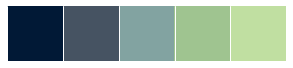

In [324]:
sns.palplot(cores)

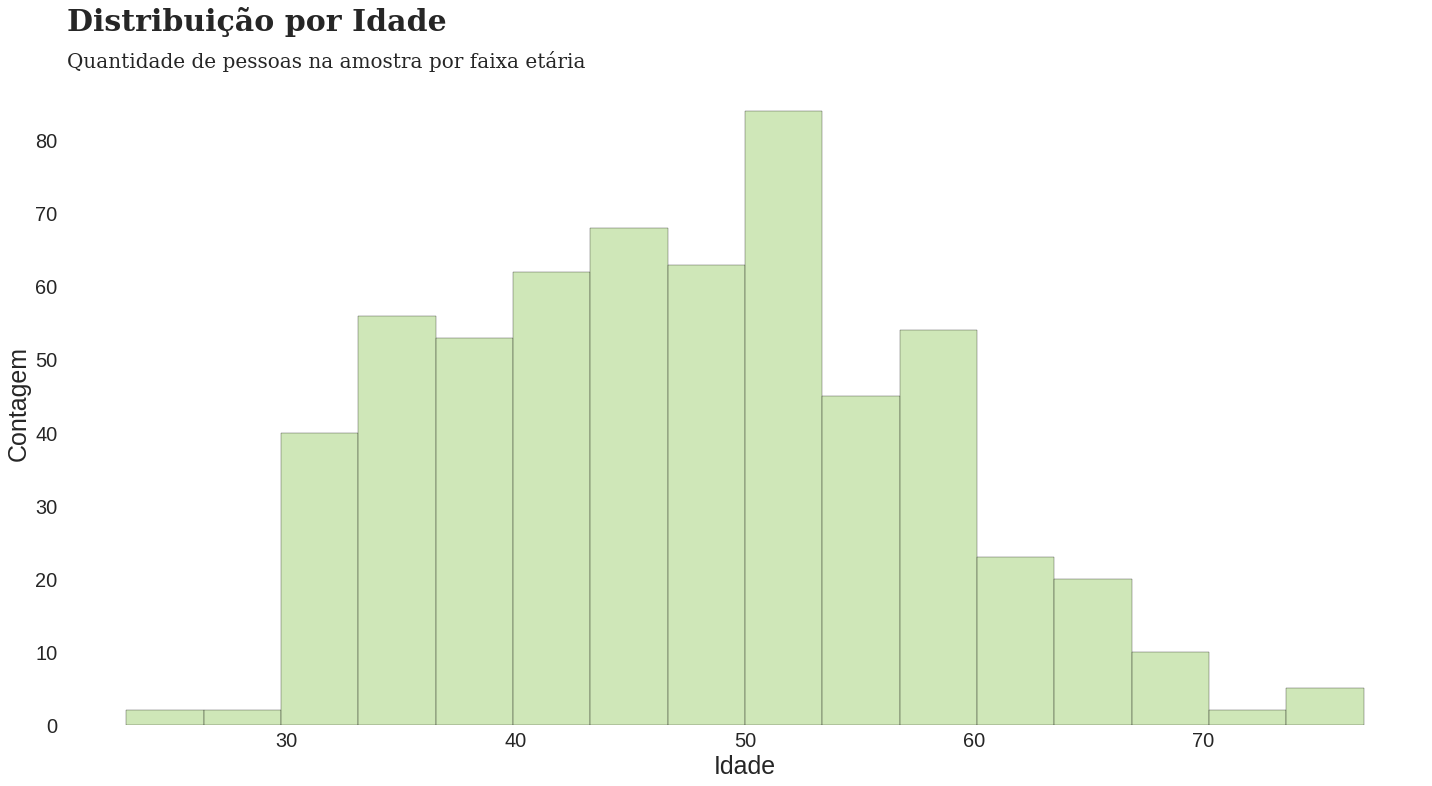

In [369]:
# Plot, Fig :

fig, ax =plt.subplots(figsize=(20,10))
sns.histplot(ds["Age"],color = cores[4])



# Format: 

ax.tick_params(labelsize=20)


# Labels 
ax.set_ylabel('Contagem', size=25)
ax.set_xlabel('Idade',size=25)
#ax.legend(fontsize=20, loc = 'upper right', shadow=True)
#ax.set_xlim(xmin=1990,xmax=2020)
#ax.set_ylim(ymin=80,ymax=3500000)
plt.tight_layout() 

background_color = "#ffffff"
fig.patch.set_facecolor(background_color) # figure background color
ax.set_facecolor(background_color) # axes background color

ax.text(20.4,95, 
         'Distribuição por Idade', 
         fontsize=30, 
         fontweight='bold', 
         fontfamily='serif',
        )


ax.text(20.4, 90,
         'Quantidade de pessoas na amostra por faixa etária', 
         fontsize=20, 
         fontweight='light', 
         fontfamily='serif',
        )

plt.savefig("dist_idade.png", dpi=100,bbox_inches='tight', transparent=True)


#plt.title('Distribuição da Idade')
#plt.show()

In [383]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [390]:
df_box = ds[["ALB","ALP","ALT","AST","BIL","CHE","CHOL","CREA","GGT","PROT"]]

In [391]:
df_box

,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...
610,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


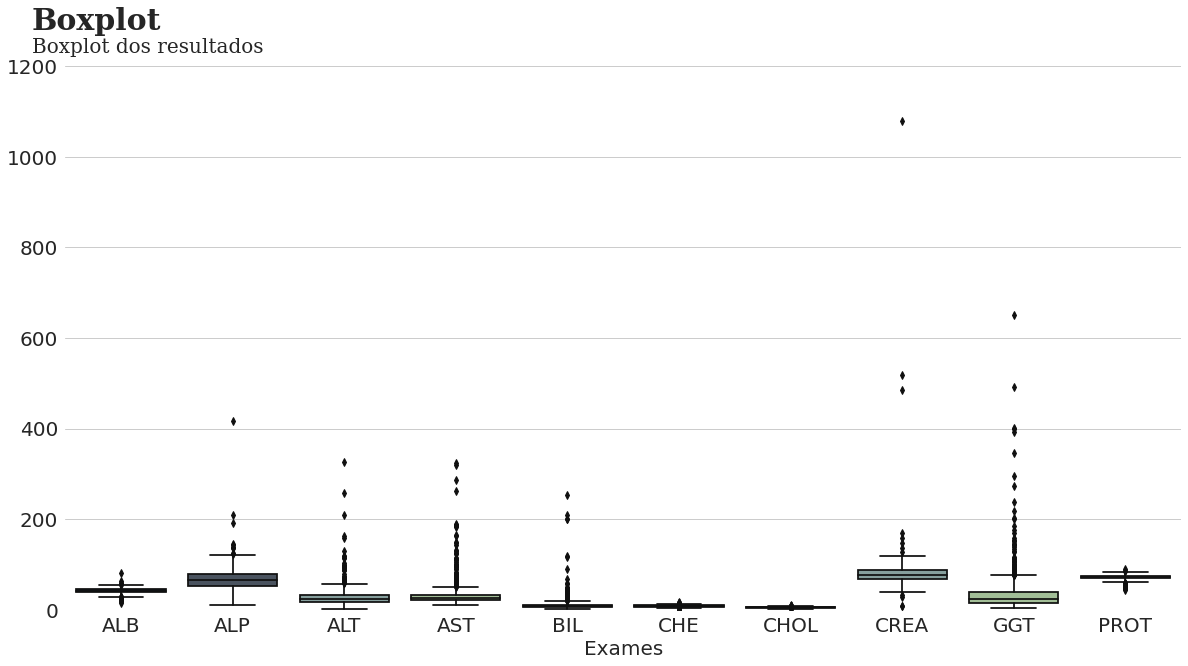

In [480]:
#f, axes = plt.subplots(1, 1)
plt.figure(figsize=(20,10))
ax = sns.boxplot( data=df_box,  orient='v', palette=cores)


#fig, ax = sns.subplots(figsize=(20,10))

#sns.set_style("ticks")


sns.set_style("whitegrid")


#ax.set_ylabel('Contagem', size=20)
#ax.set_xlabel('Estado de Saúde',size=20)


plt.text(-0.8,1280, 
        
         'Boxplot', 
         fontsize=30, 
         fontweight='bold', 
         fontfamily='serif',
        )


plt.text(-0.8,1230, 
         'Boxplot dos resultados ', 
         fontsize=20, 
         fontweight='light', 
         fontfamily='serif',
        )

plt.ylim(0,1200)

#ax.set_ylabel('Contagem', size=20)
ax.set_xlabel('Exames',size=20)

ax.tick_params(labelsize=20)


#plt.savefig("box.png", dpi=100,bbox_inches='tight', transparent=True)


#sns.boxplot(  y="c", x= "a", data=df,  orient='v'

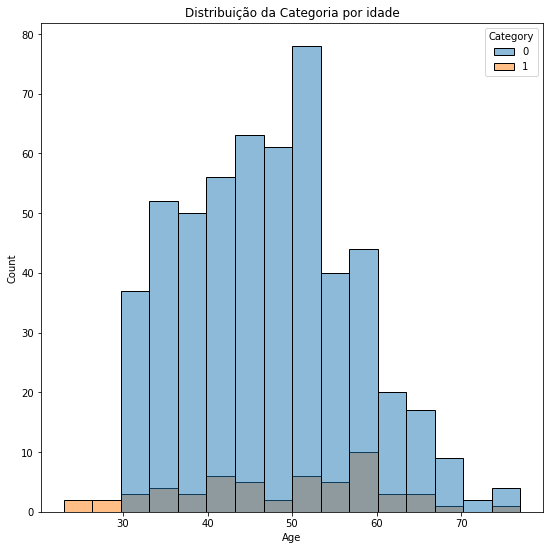

In [15]:
plt.figure(figsize=(9,9))
sns.histplot(ds[['Age', 'Category']], x = "Age", hue="Category")
plt.title("Distribuição da Categoria por idade")
plt.show()

In [16]:
# Separando os dados por Sexo:
dh = ds.loc[ds.Sex == 'm']
dm = ds.loc[ds.Sex == 'f']

In [17]:
dh['Category'].value_counts(normalize=True)

0    0.889807
1    0.110193
Name: Category, dtype: float64

In [18]:
dm['Category'].value_counts(normalize=True)

0    0.929204
1    0.070796
Name: Category, dtype: float64

In [36]:
ds

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,609,1,58,f,34.0,46.4,15.0,150.0,8.0,6.26,3.98,56.0,49.7,80.6
609,610,1,59,f,39.0,51.3,19.6,285.8,40.0,5.77,4.51,136.1,101.1,70.5
610,611,1,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,1,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3


<ipython-input-368-0ba5ff4d0890>:48: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "transparente" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("cont_sex.png", dpi=200,bbox_inches='tight', transparente = True)


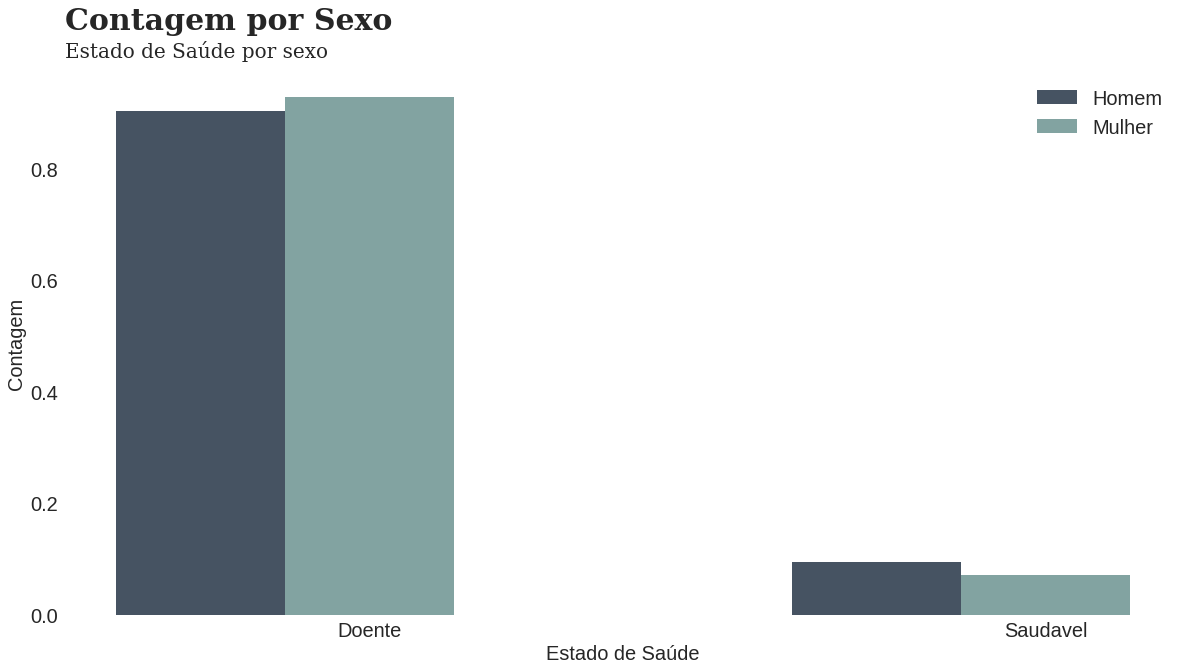

In [368]:
# Plot:

x = np.arange(2)


fig, ax = plt.subplots(figsize=(20,10))

barWidht = 0.25



plt.bar(x,ds['Category'].value_counts(normalize=True),width=0.25, color= cores[1],label = "Homem" )
plt.bar(x+barWidht,dm['Category'].value_counts(normalize=True), width= 0.25, color=cores[2], label="Mulher")
local = x+barWidht


ax.tick_params(labelsize=20)



# Format:
labels = ['Doente','Saudavel']
plt.xticks(local,labels)
#plt.legend()
ax.legend(fontsize=20, loc = 'upper right', shadow=True)
background_color = "#ffffff"
fig.patch.set_facecolor(background_color) # figure background color
ax.set_facecolor(background_color) # axes background color

ax.set_ylabel('Contagem', size=20)
ax.set_xlabel('Estado de Saúde',size=20)
ax.text(-0.20,1.05, 
        
         'Contagem por Sexo', 
         fontsize=30, 
         fontweight='bold', 
         fontfamily='serif',
        )


ax.text(-0.2,1.0, 
         'Estado de Saúde por sexo ', 
         fontsize=20, 
         fontweight='light', 
         fontfamily='serif',
        )

plt.savefig("cont_sex.png", dpi=200,bbox_inches='tight', transparente = True)


plt.show()

In [117]:
'''
# Plot:
#fig = plt.figure(figsize=(15,20)) # create figure
#gs = fig.add_gridspec(7, 1)
#gs.update(wspace=0, hspace=0.5)
#plt.subplots_adjust(hspace=1)

colunas = ds.columns[4:]


fig, ax = plt.subplots(nrows=len(colunas), ncols=1, sharex=True,figsize = (10,30))
X = ds['Age']


for i in range(len(colunas)):
  y = ds[colunas[i]]
  scatter = ax[i].scatter(x = X, y = y, c = ds['Category'], cmap='winter')
  ax[i].tick_params(labelsize=12)
  ax[i].set(title=f'{colunas[i]} por idade', xlabel="Age", ylabel=colunas[i])
  ax[i].legend(*scatter.legend_elements(), title = 'Hepatite')
plt.subplots_adjust(hspace=1)






ax.text(1990,3700000, 
         'Novos infectados HIV', 
         fontsize=30, 
         fontweight='bold', 
         fontfamily='serif',
        )


ax.text(1990,3550000, 
         'Número estimado de novos infectdos pelo vírus HIV por região', 
         fontsize=20, 
         fontweight='light', 
         fontfamily='serif',
        )


# Format:

#ax.set(title=f'{colunas[i]} por idade', xlabel="Age", ylabel=colunas[i])
#ax.legend(*scatter.legend_elements(), title = 'Hepatite')


#ax.tick_params(labelsize=20)




#fig.subtitle("Análise Hepatite C", size= 20)

'''

'\n# Plot:\n#fig = plt.figure(figsize=(15,20)) # create figure\n#gs = fig.add_gridspec(7, 1)\n#gs.update(wspace=0, hspace=0.5)\n#plt.subplots_adjust(hspace=1)\n\ncolunas = ds.columns[4:]\n\n\nfig, ax = plt.subplots(nrows=len(colunas), ncols=1, sharex=True,figsize = (10,30))\nX = ds[\'Age\']\n\n\nfor i in range(len(colunas)):\n  y = ds[colunas[i]]\n  scatter = ax[i].scatter(x = X, y = y, c = ds[\'Category\'], cmap=\'winter\')\n  ax[i].tick_params(labelsize=12)\n  ax[i].set(title=f\'{colunas[i]} por idade\', xlabel="Age", ylabel=colunas[i])\n  ax[i].legend(*scatter.legend_elements(), title = \'Hepatite\')\nplt.subplots_adjust(hspace=1)\n\n\n\n\n\n\nax.text(1990,3700000, \n         \'Novos infectados HIV\', \n         fontsize=30, \n         fontweight=\'bold\', \n         fontfamily=\'serif\',\n        )\n\n\nax.text(1990,3550000, \n         \'Número estimado de novos infectdos pelo vírus HIV por região\', \n         fontsize=20, \n         fontweight=\'light\', \n         fontfamily=\'s

In [58]:
ds.columns

Index(['Unnamed: 0', 'Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST',
       'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')

<ipython-input-583-413070e8594d>:132: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "transparente" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("resul_exam.png", dpi=200,bbox_inches='tight', transparente = True)


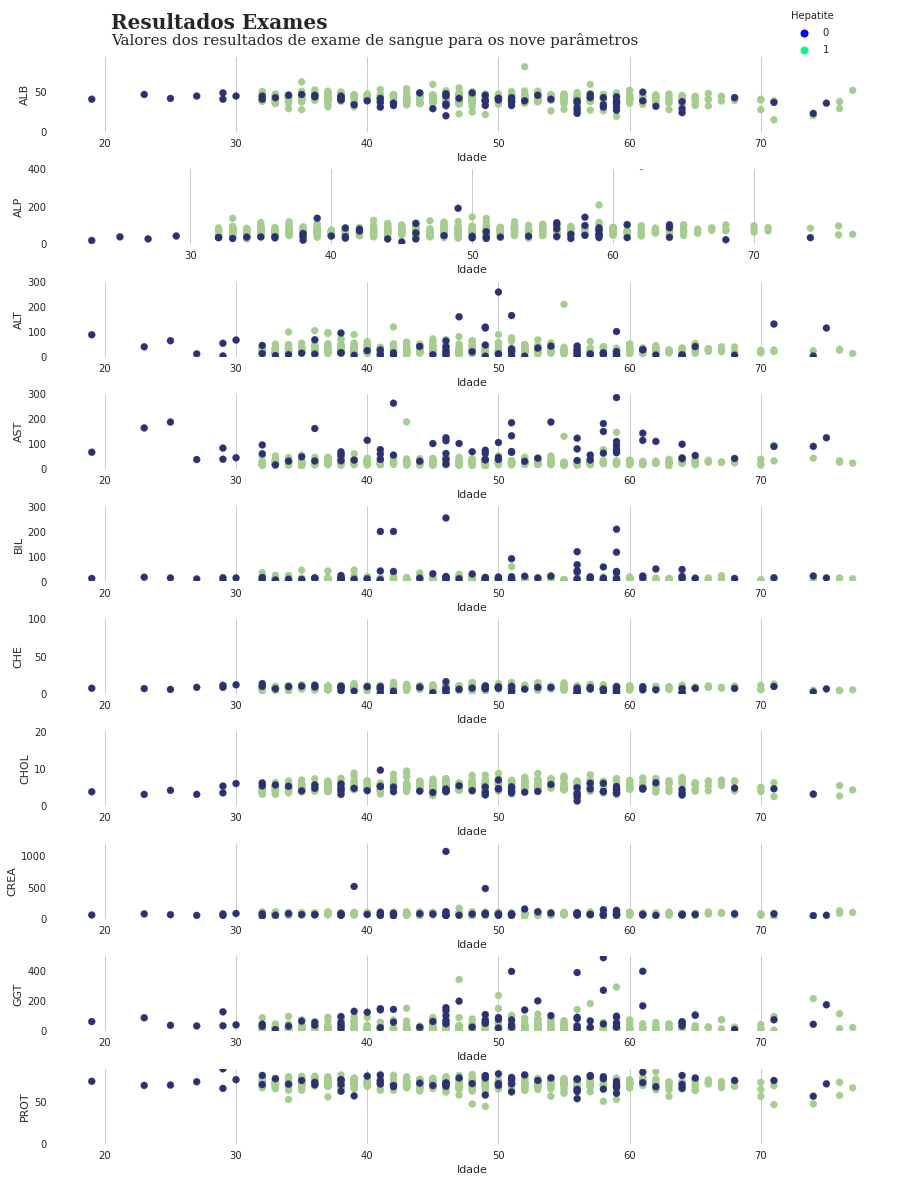

In [583]:
# Fig:

fig = plt.figure(figsize=(15,20)) # create figure
gs = fig.add_gridspec(10, 1)
gs.update(wspace=0, hspace=0.5)
ax0 = fig.add_subplot(gs[0, 0], ylim=(0, 95))
ax1 = fig.add_subplot(gs[1, 0], ylim=(0,400)) # create axes
ax2 = fig.add_subplot(gs[2, 0], ylim=(0, 300)) # create axes
ax3 = fig.add_subplot(gs[3, 0], ylim=(0, 300)) # create axes
ax4 = fig.add_subplot(gs[4, 0], ylim=(0, 300)) # create axes
ax5 = fig.add_subplot(gs[5, 0], ylim=(0, 100)) # create axes
ax6 = fig.add_subplot(gs[6, 0], ylim=(0, 20)) # create axes
ax7 = fig.add_subplot(gs[7, 0], ylim=(0, 1200)) # create axes
ax8 = fig.add_subplot(gs[8, 0], ylim=(0, 500)) # create axes
ax9 = fig.add_subplot(gs[9, 0], ylim=(0, 90)) # create axes


# Plot: 

ax0.scatter(x = ds["Age"], y = ds["ALB"], c = ds['Category'], cmap="crest"   )
ax0.grid(color='black', linestyle=':', axis='y', zorder=0,  dashes=(1,5))


ax1.scatter(x = ds["Age"], y = ds["ALP"], c = ds['Category'], cmap="crest")
ax1.grid(color='black', linestyle=':', axis='y', zorder=0,  dashes=(1,5))


ax2.scatter(x = ds["Age"], y = ds["ALT"], c = ds['Category'], cmap='crest')
ax2.grid(color='black', linestyle=':', axis='y', zorder=0,  dashes=(1,5))


ax3.scatter(x = ds["Age"], y = ds["AST"], c = ds['Category'], cmap='crest')
ax3.grid(color='black', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

ax4.scatter(x = ds["Age"], y = ds["BIL"], c = ds['Category'], cmap='crest')
ax4.grid(color='black', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

ax5.scatter(x = ds["Age"], y = ds["CHE"], c = ds['Category'], cmap='crest')
ax5.grid(color='black', linestyle=':', axis='y', zorder=0,  dashes=(1,5))



ax6.scatter(x = ds["Age"], y = ds["CHOL"], c = ds['Category'], cmap='crest')
ax6.grid(color='black', linestyle=':', axis='y', zorder=0,  dashes=(1,5))


ax7.scatter(x = ds["Age"], y = ds["CREA"], c = ds['Category'], cmap='crest')
ax7.grid(color='black', linestyle=':', axis='y', zorder=0,  dashes=(1,5))


ax8.scatter(x = ds["Age"], y = ds["GGT"], c = ds['Category'], cmap='crest')
ax8.grid(color='black', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

ax9.scatter(x = ds["Age"], y = ds["PROT"], c = ds['Category'], cmap='crest')
ax9.grid(color='black', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

# Label:

# x Label 
ax0.set_xlabel("Idade")
ax1.set_xlabel("Idade")
ax2.set_xlabel("Idade")
ax3.set_xlabel("Idade")
ax4.set_xlabel("Idade")
ax5.set_xlabel("Idade")
ax6.set_xlabel("Idade")
ax7.set_xlabel("Idade")
ax8.set_xlabel("Idade")
ax9.set_xlabel("Idade")
#  y Label
ax0.set_ylabel("ALB")
ax1.set_ylabel("ALP")
ax2.set_ylabel("ALT")
ax3.set_ylabel("AST")
ax4.set_ylabel("BIL")
ax5.set_ylabel("CHE")
ax6.set_ylabel("CHOL")
ax7.set_ylabel("CREA")
ax8.set_ylabel("GGT")
ax9.set_ylabel("PROT")

# Change background color
background_color = "#ffffff"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) # axes background color
ax1.set_facecolor(background_color) # axes background color
ax2.set_facecolor(background_color) # axes background color
ax3.set_facecolor(background_color) # axes background color
ax4.set_facecolor(background_color) # axes background color
ax5.set_facecolor(background_color) # axes background color
ax6.set_facecolor(background_color) # axes background color
ax7.set_facecolor(background_color) # axes background color
ax8.set_facecolor(background_color) # axes background color
ax9.set_facecolor(background_color) # axes background color              
#color_map = ["#bdbdbd" for _ in range(11)]
#color_map[2] = "#008294"


#plt.legend(fontsize=20, loc = 'right', shadow=True)
#ax0.legend(loc='upper left')

#plt.legend([ax1, ax2, ax3],["HHZ 1", "HHN", "HHE"])

#ax1.legend(loc="upper right")
#ax.legend(loc="upper right")
ax0.legend(*scatter.legend_elements(), title = 'Hepatite',bbox_to_anchor=(0.87,0.9) )

ax0.text(20.5,130, 
         'Resultados Exames', 
         fontsize=20, 
         fontweight='bold', 
         fontfamily='serif',
        )


ax0.text(20.5,110, 
         'Valores dos resultados de exame de sangue para os nove parâmetros', 
         fontsize=15, 
         fontweight='light', 
         fontfamily='serif',
        )





#ax0.scatter(x = X, y = y, c = ds['Category'], cmap='winter')
#ax0.grid(color='black', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
#ax0.bar(ds["Age"], ds["ALB"], 
      # color=cores[0]
    
plt.savefig("resul_exam.png", dpi=200,bbox_inches='tight', transparente = True)

plt.show()


['#011936', '#465362', '#82a3a1', '#9fc490', '#c0dfa1']

In [113]:
ds["Sex"] = ds['Sex'].map({'m':1,'f':2})
ds.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [114]:
ds['Category']=ds['Category'].astype(float)

In [115]:
ds=ds.drop('Unnamed: 0', axis=1)

In [419]:
cores

['#011936', '#465362', '#82a3a1', '#9fc490', '#c0dfa1']

In [420]:
#customPalette = sns.set_palette(sns.color_palette(cores))

In [421]:
custom_cores = list(cores)
#custom_cores = custom_cores.reverse()


In [422]:
#custom_cores.reverse()

In [423]:
custom_cores

['#011936', '#465362', '#82a3a1', '#9fc490', '#c0dfa1']

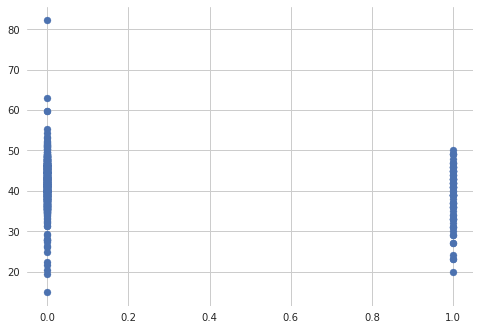

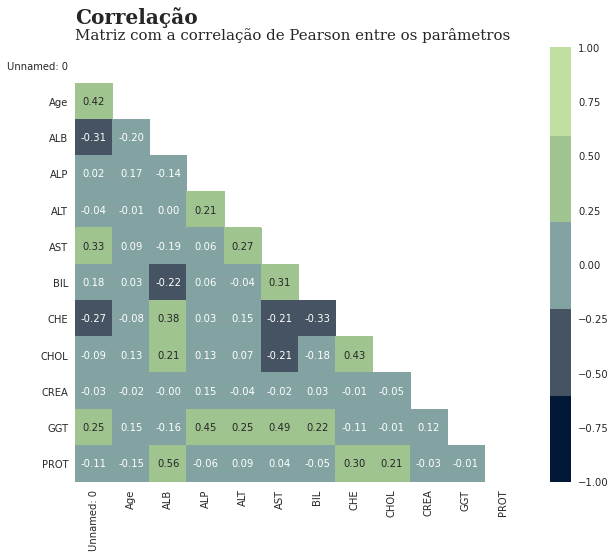

In [597]:
# Correlação entre os Dados:

# Fig:
 
fig, ax = plt.subplots(figsize=(10,8))

# Plot: 
matrix = np.triu(ds.corr())

sns.heatmap(ds.corr(), annot=True, fmt='.2f', cmap=custom_cores,vmin=-1,center=0, mask=matrix,vmax=1,ax=ax)



ax.text(0,-0.65, 
         'Correlação', 
         fontsize=20, 
         fontweight='bold', 
         fontfamily='serif',
        )


ax.text(0,-0.2, 
         'Matriz com a correlação de Pearson entre os parâmetros', 
         fontsize=15, 
         fontweight='light', 
         fontfamily='serif',
        )
#plt.savefig("corre.png", dpi=200,bbox_inches='tight', transparente = True)


plt.show()


In [19]:
print ( f'Total de Pacientes Suspeitos: {ds.Category.value_counts()[1]}')
print(f'Total de Pacientes Saudáveis: {ds.Category.value_counts()[0]}')

Total de Pacientes Suspeitos: 56
Total de Pacientes Saudáveis: 533


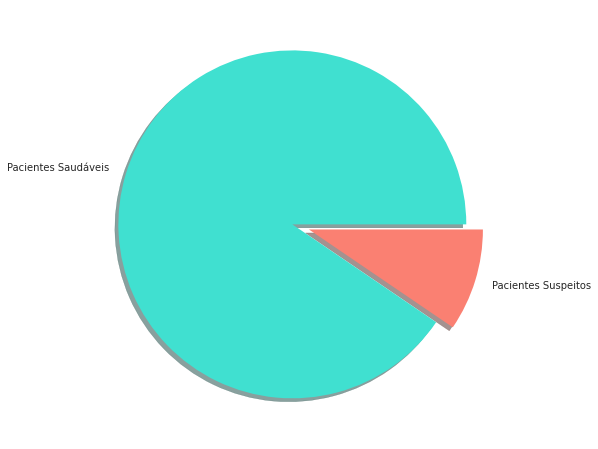

In [20]:
# Comparação entre pacientes Saudáveis e suspeitos:

plt.style.use('seaborn')
fig,ax = plt.subplots(figsize=(8,8))
plt.pie(x= ds['Category'].value_counts(),
        colors=['turquoise','salmon'],
        labels=['Pacientes Saudáveis',"Pacientes Suspeitos"],
        shadow= True,
        explode = (0,0.1)
        
        )
plt.show()

In [21]:
ds.Sex.value_counts()

1    363
2    226
Name: Sex, dtype: int64

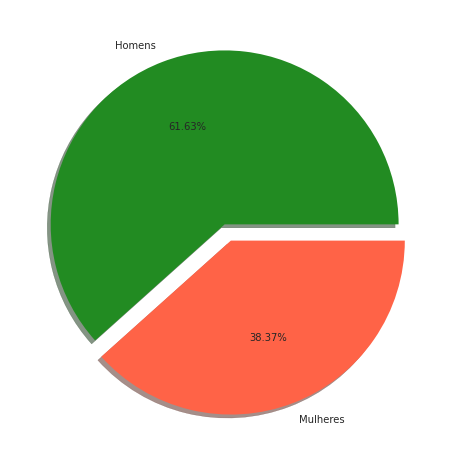

In [22]:
plt.style.use('seaborn')
fig,ax = plt.subplots(figsize=(8,8))
plt.pie(x=ds['Sex'].value_counts(),
        colors=["forestgreen",'tomato'],
        labels=["Homens", "Mulheres"],
        shadow = True,
        autopct ="%1.2f%%",
        explode=(0,0.1)
)
plt.show()

<div style="background-color:#99EEAA; color:#000066;">
    <h2><center>Modelagem:</center></h2>
</div>

Dividindo os Dados de Treino e Teste:

In [184]:
 # X
X = ds.drop("Category",axis=1)
X.head()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [185]:
# Y 
y = ds['Category']
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Category, dtype: float64

In [186]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)


In [187]:
len(x_test), len(x_train)

(118, 471)

In [692]:
len(x_test)

118

In [693]:
len(x_train)

471

In [188]:
# Scalando os dados:

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

<div style="background-color:#99EEAA; color:#000066;">
    <h3><center>Regressão Logística</center></h3>
</div>
 

In [189]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [190]:
LogisticRegressionScore = lr.score(x_test, y_test)
print(f'Precisão do modelo LogisticRegression: {LogisticRegressionScore}')

Precisão do modelo LogisticRegression: 0.9576271186440678


<div style="background-color:#99EEAA; color:#000066;">
    <h4><center>Confussion Matrix para RL</center></h4>
</div>


<AxesSubplot:>

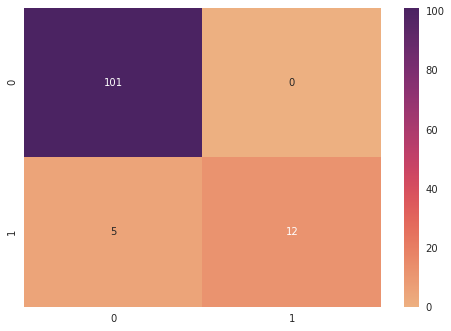

In [716]:
y_pred_lr = lr.predict(x_test)
matrix_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(matrix_lr, annot=True, cmap='flare',fmt='g')

In [192]:
# Dados precisão do modelo:

print(metrics.classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98       101
         1.0       1.00      0.71      0.83        17

    accuracy                           0.96       118
   macro avg       0.98      0.85      0.90       118
weighted avg       0.96      0.96      0.95       118



<div style="background-color:#99EEAA; color:#000066;">
    <h3><center> Random Forest Classifier  </center></h3>
</div>



In [193]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [194]:
RandomForestClassifierScore = rfc.score(x_test, y_test)
print(f'Precisão do modelo RandomForestClassifier: {RandomForestClassifierScore}')

Precisão do modelo RandomForestClassifier: 0.940677966101695


<div style="background-color:#99EEAA; color:#000066;">
    <h4><center> Confusion Matrix para RFC  </center></h4>
</div>


<AxesSubplot:>

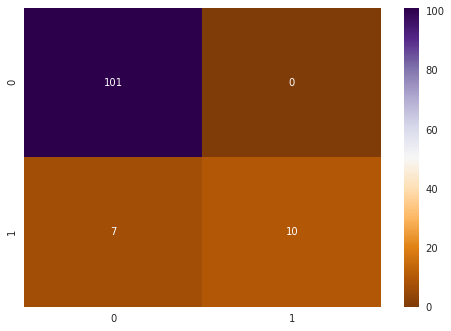

In [715]:
y_pred_rfc = rfc.predict(x_test)
matrix_rfc = confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(matrix_rfc, annot=True, cmap="PuOr",fmt='g')

In [196]:
print(metrics.classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       101
         1.0       1.00      0.59      0.74        17

    accuracy                           0.94       118
   macro avg       0.97      0.79      0.85       118
weighted avg       0.94      0.94      0.93       118



<div style="background-color:#99EEAA; color:#000066;">
    <h3><center> K Neighbors Classifier:  </center></h3>
</div>
 

In [197]:
knc = KNeighborsClassifier()
knc.fit(x_train, y_train)

KNeighborsClassifier()

In [198]:
KNeighborsClassifierScore = knc.score(x_test, y_test)
print(f'Precisão do Modelo KNC: {KNeighborsClassifierScore}')

Precisão do Modelo KNC: 0.9322033898305084


<div style="background-color:#99EEAA; color:#000066;">
    <h4><center>Confusion Matrix para KNC   </center></h4>
</div>


<AxesSubplot:>

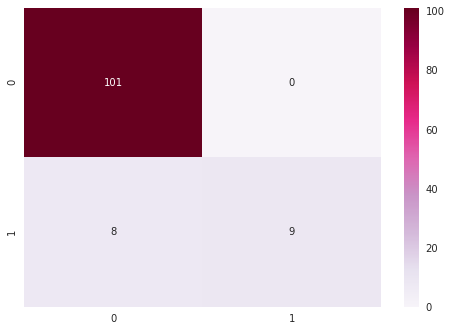

In [714]:
y_pred_knc = knc.predict(x_test)
matrix_knc = confusion_matrix(y_test, y_pred_knc)
sns.heatmap(matrix_knc, annot=True, cmap='PuRd',fmt='g')

In [200]:
print(metrics.classification_report(y_test,y_pred_knc))

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96       101
         1.0       1.00      0.53      0.69        17

    accuracy                           0.93       118
   macro avg       0.96      0.76      0.83       118
weighted avg       0.94      0.93      0.92       118



<div style="background-color:#99EEAA; color:#000066;">
    <h3><center> Decision Tree Classifier:  </center></h3>
</div>


In [201]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [202]:
DecisionTreeClassifierScore = tree.score(x_test, y_test)
print(f'Precisão do modelo DTC: {DecisionTreeClassifierScore}')

Precisão do modelo DTC: 0.940677966101695



<div style="background-color:#99EEAA; color:#000066;">
    <h4><center>   Confusion Matrix para DTC </center></h4>
</div>

<AxesSubplot:>

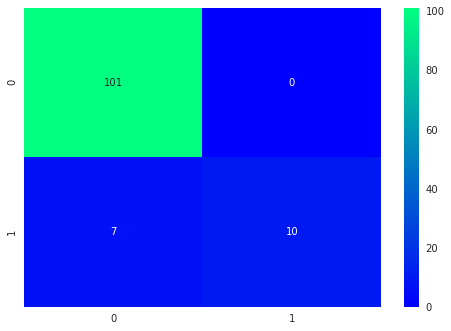

In [713]:
y_pred_tree = tree.predict(x_test)
matrix_tree = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(matrix_tree, annot=True, cmap='winter',fmt='g')

In [204]:
print(metrics.classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       101
         1.0       1.00      0.59      0.74        17

    accuracy                           0.94       118
   macro avg       0.97      0.79      0.85       118
weighted avg       0.94      0.94      0.93       118




<div style="background-color:#99EEAA; color:#000066;">
    <h3><center>  CatBoost Classifier: </center></h3>
</div>

In [205]:
cat = CatBoostClassifier(iterations= 10)
cat.fit(x_train, y_train)

Learning rate set to 0.5
0:	learn: 0.3991804	total: 52.5ms	remaining: 472ms
1:	learn: 0.2753486	total: 54ms	remaining: 216ms
2:	learn: 0.1954765	total: 55.4ms	remaining: 129ms
3:	learn: 0.1492212	total: 58.3ms	remaining: 87.4ms
4:	learn: 0.1179036	total: 61.4ms	remaining: 61.4ms
5:	learn: 0.0916512	total: 63.8ms	remaining: 42.5ms
6:	learn: 0.0731898	total: 65.8ms	remaining: 28.2ms
7:	learn: 0.0608813	total: 67.5ms	remaining: 16.9ms
8:	learn: 0.0529468	total: 69.3ms	remaining: 7.7ms
9:	learn: 0.0469205	total: 70.8ms	remaining: 0us


In [206]:
CatBoostClassifierScore= cat.score(x_test,y_test)
print(f'Precisão do modelo CBC: {CatBoostClassifierScore}')

Precisão do modelo CBC: 0.9576271186440678


<div style="background-color:#99EEAA; color:#000066;">
    <h4><center> Confusion Matrix para CBC:  </center></h4>
</div>

<AxesSubplot:>

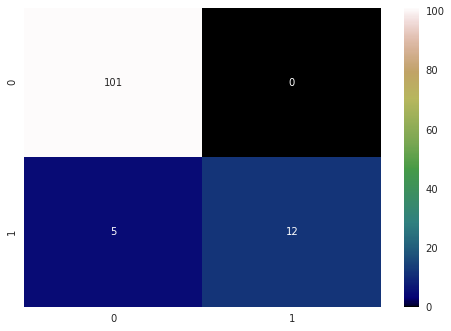

In [712]:
y_pred_cat = cat.predict(x_test)
matrix_cat = confusion_matrix(y_test, y_pred_cat)
sns.heatmap(matrix_cat, annot=True, cmap='gist_earth',fmt='g')

In [706]:
print(metrics.classification_report(y_test,y_pred_cat))


              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98       101
         1.0       1.00      0.71      0.83        17

    accuracy                           0.96       118
   macro avg       0.98      0.85      0.90       118
weighted avg       0.96      0.96      0.95       118



<Figure size 576x396 with 0 Axes>


<div style="background-color:#99EEAA; color:#000066;">
    <h3><center> Gradient Boosting Classifier:  </center></h3>
</div>

In [209]:
gbc =  GradientBoostingClassifier()
gbc.fit(x_train, y_train)

GradientBoostingClassifier()

In [210]:
GradientBoostingClassifierScore = gbc.score(x_test,y_test)
print(f'Precisão do modelo GBC: {GradientBoostingClassifierScore}')

Precisão do modelo GBC: 0.940677966101695



<div style="background-color:#99EEAA; color:#000066;">
    <h4><center>   Confusion Matrix para GBC: </center></h4>
</div>

<AxesSubplot:>

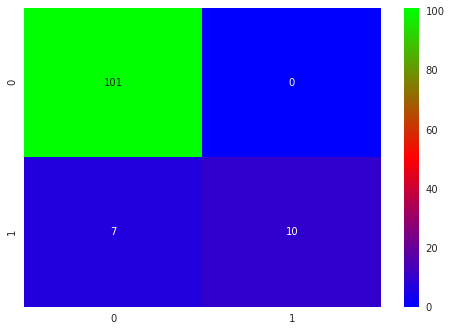

In [711]:
y_pred_gbc = gbc.predict(x_test)
matrix_gbc = confusion_matrix(y_test,y_pred_gbc)
sns.heatmap(matrix_gbc, annot=True, cmap='brg', fmt='g')

In [601]:
print(metrics.classification_report(y_test, y_pred_gbc))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       101
         1.0       1.00      0.59      0.74        17

    accuracy                           0.94       118
   macro avg       0.97      0.79      0.85       118
weighted avg       0.94      0.94      0.93       118




<div style="background-color:#99EEAA; color:#000066;">
    <h2><center> Comparando Modelos:  </center></h2>
</div>

<ipython-input-722-cb0a49d822db>:58: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "transparente" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("matriz_confu.png", dpi=200,bbox_inches='tight', transparente = True)


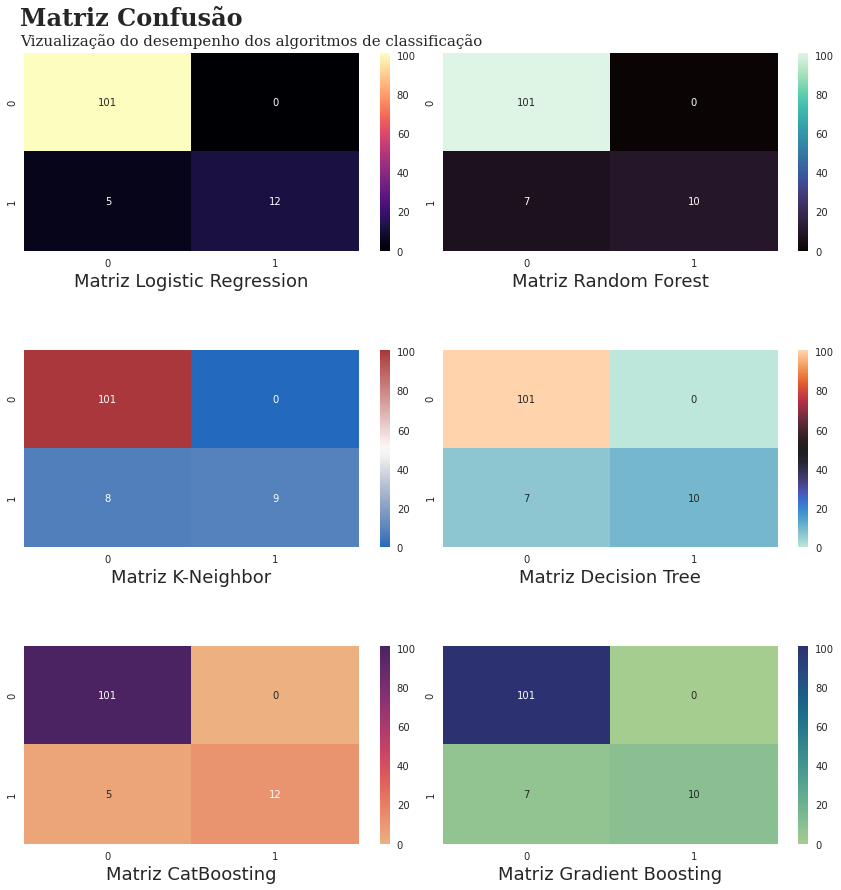

In [722]:



fig = plt.figure(figsize=(15,20)) # create figure



gs = fig.add_gridspec(4, 2 )
gs.update(wspace=0, hspace=0.5)
ax0 = fig.add_subplot(gs[0, 0], ylim=(0, 95))
ax1 = fig.add_subplot(gs[0,1], ylim=(0,400)) # create axes
ax2 = fig.add_subplot(gs[1, 0], ylim=(0, 300)) # create axes
ax3 = fig.add_subplot(gs[1, 1], ylim=(0, 300)) # create axes
ax4 = fig.add_subplot(gs[2, 0]) # create axes
ax5 = fig.add_subplot(gs[2, 1], ylim=(0, 100))


sns.heatmap(matrix_lr, annot=True,cmap="magma" , ax = ax0, label = "fsdgsd",fmt='g')
sns.heatmap(matrix_rfc, annot=True, cmap='mako',ax = ax1,fmt='g')
sns.heatmap(matrix_knc, annot=True, cmap='vlag',ax = ax2,fmt='g')
sns.heatmap(matrix_tree, annot=True, cmap='icefire',ax = ax3,fmt='g')
sns.heatmap(matrix_cat, annot=True, cmap="flare",ax = ax4,fmt='g')
sns.heatmap(matrix_gbc, annot=True, cmap="crest",ax = ax5,fmt='g')




ax0.text(-0.026,-0.28, 
         'Matriz Confusão', 
         fontsize=24, 
         fontweight='bold', 
         fontfamily='serif',
        )


ax0.text(-0.026,-0.08, 
         'Vizualização do desempenho dos algoritmos de classificação', 
         fontsize=15, 
         fontweight='light', 
         fontfamily='serif',
        )


# x Label ,fontsize=18
ax0.set_xlabel("Matriz Logistic Regression",fontsize=18)
ax1.set_xlabel("Matriz Random Forest",fontsize=18)
ax2.set_xlabel("Matriz K-Neighbor",fontsize=18)
ax3.set_xlabel("Matriz Decision Tree",fontsize=18)
ax4.set_xlabel("Matriz CatBoosting",fontsize=18)
ax5.set_xlabel("Matriz Gradient Boosting",fontsize=18)




#ax0.tick_params(labelsize=20)



#gridspec_kw=dict(width_ratios=[4,1,0.2])

plt.savefig("matriz_confu.png", dpi=200,bbox_inches='tight', transparente = True)

#plt.show()

In [694]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [695]:
from tabulate import tabulate 

In [698]:
table = [['Modelo', 'Precisão', 'f1-score'], ['John', 'Smith', 39], ['Mary', 'Jane', 25], ['Jennifer', 'Doe', 28]]

In [699]:
print(tabulate(table))

--------  --------  --------
Modelo    Precisão  f1-score
John      Smith     39
Mary      Jane      25
Jennifer  Doe       28
--------  --------  --------


In [705]:
info = {"Modelos:": ['LogisticRegression', 
     "DecisionTreeClassifier",
     'RandomForestClassifier',
     "KNeighborsClassifier",
     'CatBoostClassifier',
     'GradientBoostingClassifier'],
    "Precisão":[LogisticRegressionScore, 
     DecisionTreeClassifierScore,
     RandomForestClassifierScore,
     KNeighborsClassifierScore,
     CatBoostClassifierScore,
     GradientBoostingClassifierScore]}

In [707]:
print(tabulate(info, headers='keys', tablefmt='fancy_grid'))
plt.savefig('mytable.png')

╒════════════════════════════╤════════════╕
│ Modelos:                   │   Precisão │
╞════════════════════════════╪════════════╡
│ LogisticRegression         │   0.957627 │
├────────────────────────────┼────────────┤
│ DecisionTreeClassifier     │   0.940678 │
├────────────────────────────┼────────────┤
│ RandomForestClassifier     │   0.940678 │
├────────────────────────────┼────────────┤
│ KNeighborsClassifier       │   0.932203 │
├────────────────────────────┼────────────┤
│ CatBoostClassifier         │   0.957627 │
├────────────────────────────┼────────────┤
│ GradientBoostingClassifier │   0.940678 │
╘════════════════════════════╧════════════╛


<Figure size 576x396 with 0 Axes>

<ipython-input-375-bfb78c7eecd6>:53: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "transparente" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("presc.png", dpi=200,bbox_inches='tight', transparente = True)


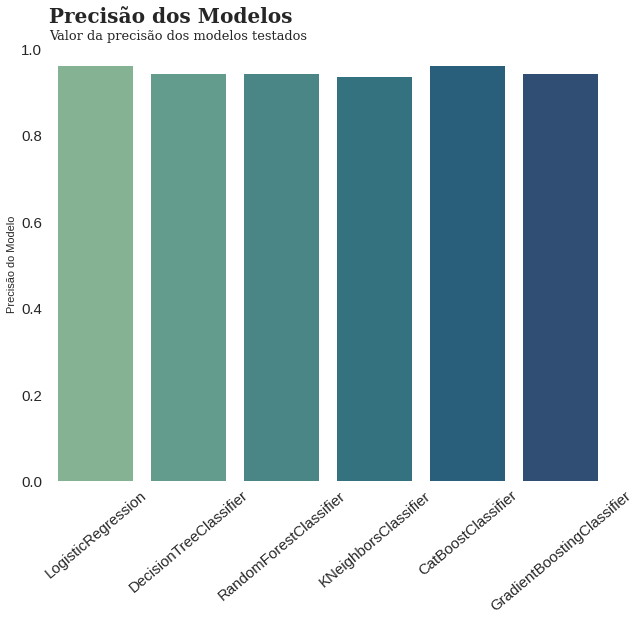

In [375]:
plt.style.use('seaborn')

fig,ax= plt.subplots(figsize=(10,8))
sns.barplot(x=X, y=y, palette='crest')




X = ['LogisticRegression', 
     "DecisionTreeClassifier",
     'RandomForestClassifier',
     "KNeighborsClassifier",
     'CatBoostClassifier',
     'GradientBoostingClassifier']

y = [LogisticRegressionScore, 
     DecisionTreeClassifierScore,
     RandomForestClassifierScore,
     KNeighborsClassifierScore,
     CatBoostClassifierScore,
     GradientBoostingClassifierScore]



ax.text(-0.5,1.06, 
         'Precisão dos Modelos', 
         fontsize=20, 
         fontweight='bold', 
         fontfamily='serif',
        )


ax.text(-0.5,1.02, 
         'Valor da precisão dos modelos testados', 
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif',
        )

background_color = "#ffffff"
fig.patch.set_facecolor(background_color) # figure background color
ax.set_facecolor(background_color)


ax.tick_params(labelsize=15)



plt.ylabel('Precisão do Modelo')
plt.xticks(rotation=40)
#plt.title('Comparação de Modelos')

plt.savefig("presc.png", dpi=200,bbox_inches='tight', transparente = True)


plt.show()


<div style="background-color:#99EEAA; color:#000066;">
    <h2><center> Relatório Final:  </center></h2>
</div>

* O modelo de classificação que apresentou melhor performance tendo como parâmentro a precisão foi o CatBoostClassifier.